In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import importlib
from os.path import expanduser, join

import task
importlib.reload(task)
from task import generate_trials

import train
importlib.reload(train)
from train import get_default_hp

from network import Model

import my_rnn_functions as mrnn
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

In [61]:
home = expanduser('~')
saving_path = join(home,'My_scripts_Local/Models_Local/ThalRNN/saved_models/')
model_name = 'full_EI_CC_TC_with_TRN_shared_h_contextdelaydm_MD_task_retanh_seed_0'
model_dir=join(saving_path,model_name)


In [62]:
importlib.reload(mrnn)
model_data = mrnn.get_model_data(model_dir)


Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(219, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 9) dtype=float32>
<tf.Variable 'output/biases:0' shape=(9,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_shared_h_contextdelaydm_MD_task_retanh_seed_0/model.ckpt
Model hp restored.

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(219, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 9) dtype=float32>
<tf.Variable 'output/biases:0' shape=(9,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_shared_h_contextdelaydm_MD_task_retanh_seed_0/model.ckpt


In [63]:
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

7.000000000000001% of weights trained.


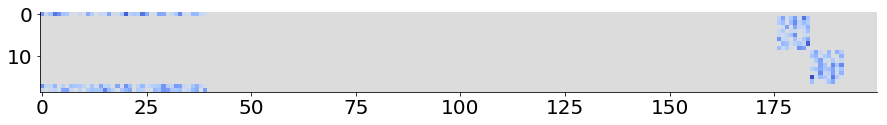

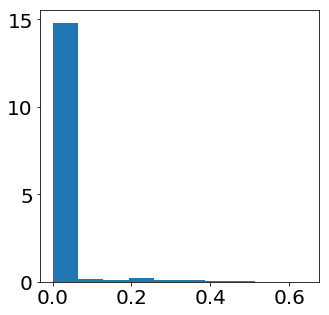

In [64]:
w_type = 'input'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


28.999999999999996% of weights trained.


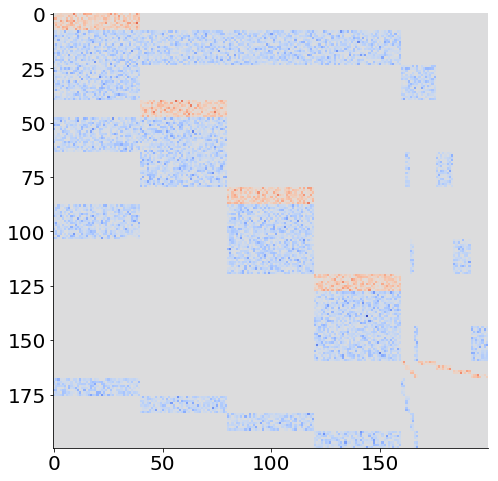

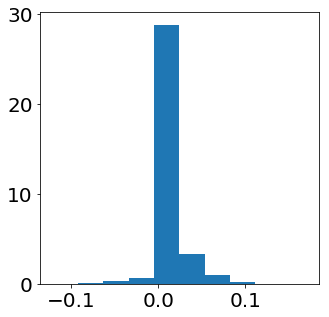

In [65]:
w_type = 'hidden'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


8.0% of weights trained.


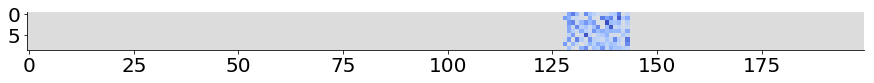

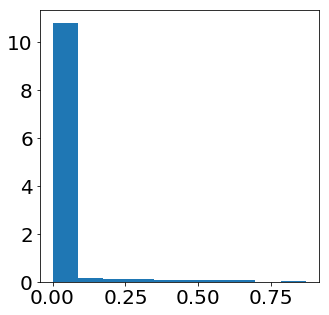

In [66]:
w_type = 'output'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3


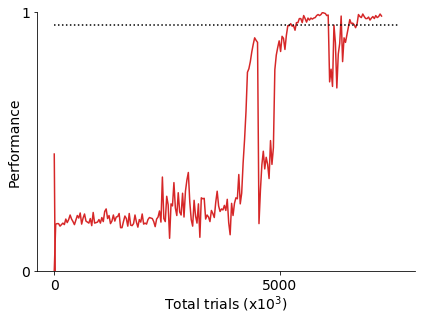

<Figure size 1080x432 with 0 Axes>

In [32]:
importlib.reload(mrnn)

trained_models = ['full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_' + str(i) for i in range(3,4)] # if i != 3 and i != 5]

rules = ['contextdelaydm_MD_task_mod1'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']

mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules,show_legend=True,labels=None)


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/TC_EI_net_with_TRN_contextdelaydm_MD_task_relu_seed_1
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/sparse_control_EI_TC_with_TRN_contextdelaydm_MD_task_relu_seed_1
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/fully_connected_EI_RNN_contextdelaydm_MD_task_relu_seed_1


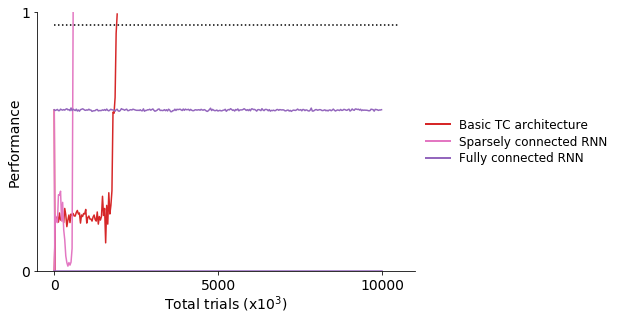

<Figure size 1080x432 with 0 Axes>

In [75]:
importlib.reload(mrnn)

trained_models = ['TC_EI_net_with_TRN_contextdelaydm_MD_task_relu_seed_1',
                  'sparse_control_EI_TC_with_TRN_contextdelaydm_MD_task_relu_seed_1',
                  'fully_connected_EI_RNN_contextdelaydm_MD_task_relu_seed_1'
                 ]

rules = ['contextdelaydm_MD_task_mod1'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']

labels = ['Basic TC architecture',
          'Sparsely connected RNN',
          'Fully connected RNN'
         ]

mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules,show_legend=True,labels=labels)


In [36]:
importlib.reload(mrnn)
print(model_name)

rule = 'contextdelaydm_MD_task_mod1' #contextdelaydm1 multidelaydm contextdelaydm2

stim1_mod1 = np.array([1])
stim1_mod2 = np.array([0])
stim2_mod1 = np.array([0])
stim2_mod2 = np.array([0])

full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3


In [35]:
n_rnn = 200
n_module = 5
prop_inh = 0.2

n_unit_mod = int(n_rnn/n_module)

subnetworks = [
    {'name': 'PFC',
     'index_range': range(0,n_unit_mod)
     #'pc_projections': 
    },
    {'name': 'Thalamus',
     'index_range': range(4*n_unit_mod+int(prop_inh*n_unit_mod),5*n_unit_mod)
    },
    {'name': 'TRN',
     'index_range': range(4*n_unit_mod,4*n_unit_mod+int(prop_inh*n_unit_mod))
    },
    {'name': 'Mod 1',
     'index_range': range(n_unit_mod,2*n_unit_mod)
    },
    {'name': 'Mod 2',
     'index_range': range(2*n_unit_mod,3*n_unit_mod)
    },
    {'name': 'Motor',
     'index_range': range(3*n_unit_mod,4*n_unit_mod)
    }
]

In [37]:
importlib.reload(mrnn)
subnetworks = mrnn.PCAs_on_subnetworks(model_dir, rule, stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2, subnetworks)


Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
Model hp restored.

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
(120, 8, 200)
(40, 960)
(960,)

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
Model hp restored.

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
(120, 8, 200)
(32, 960)
(960,)

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
Model hp restored.

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
(120, 8, 200)
(8, 960)
(960,)

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
Model hp restored.

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
(120, 8, 200)
(40, 960)
(960,)

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
Model hp restored.

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
(120, 8, 200)
(40, 960)
(960,)

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
Model hp restored.

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
(120, 8, 200)
(40, 960)
(960,)


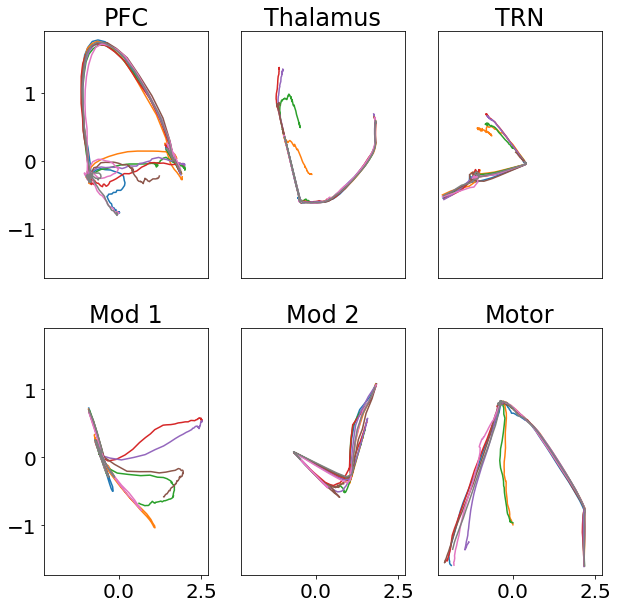

In [38]:
importlib.reload(mrnn)
mrnn.plot_subnetwork_PC_projections(subnetworks)

In [39]:
importlib.reload(mrnn)

params = mrnn.get_sensory_stim_params(stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2, n_repats=10, single_loc=True)

dict_activations = mrnn.get_all_unit_activations(model_dir, rule, params, average_activations=False)


Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
Model hp restored.

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt


In [40]:
activations = dict_activations['hidden'][:, :, range(200)]

[-0.05500000000000001, 1.049999937415123]


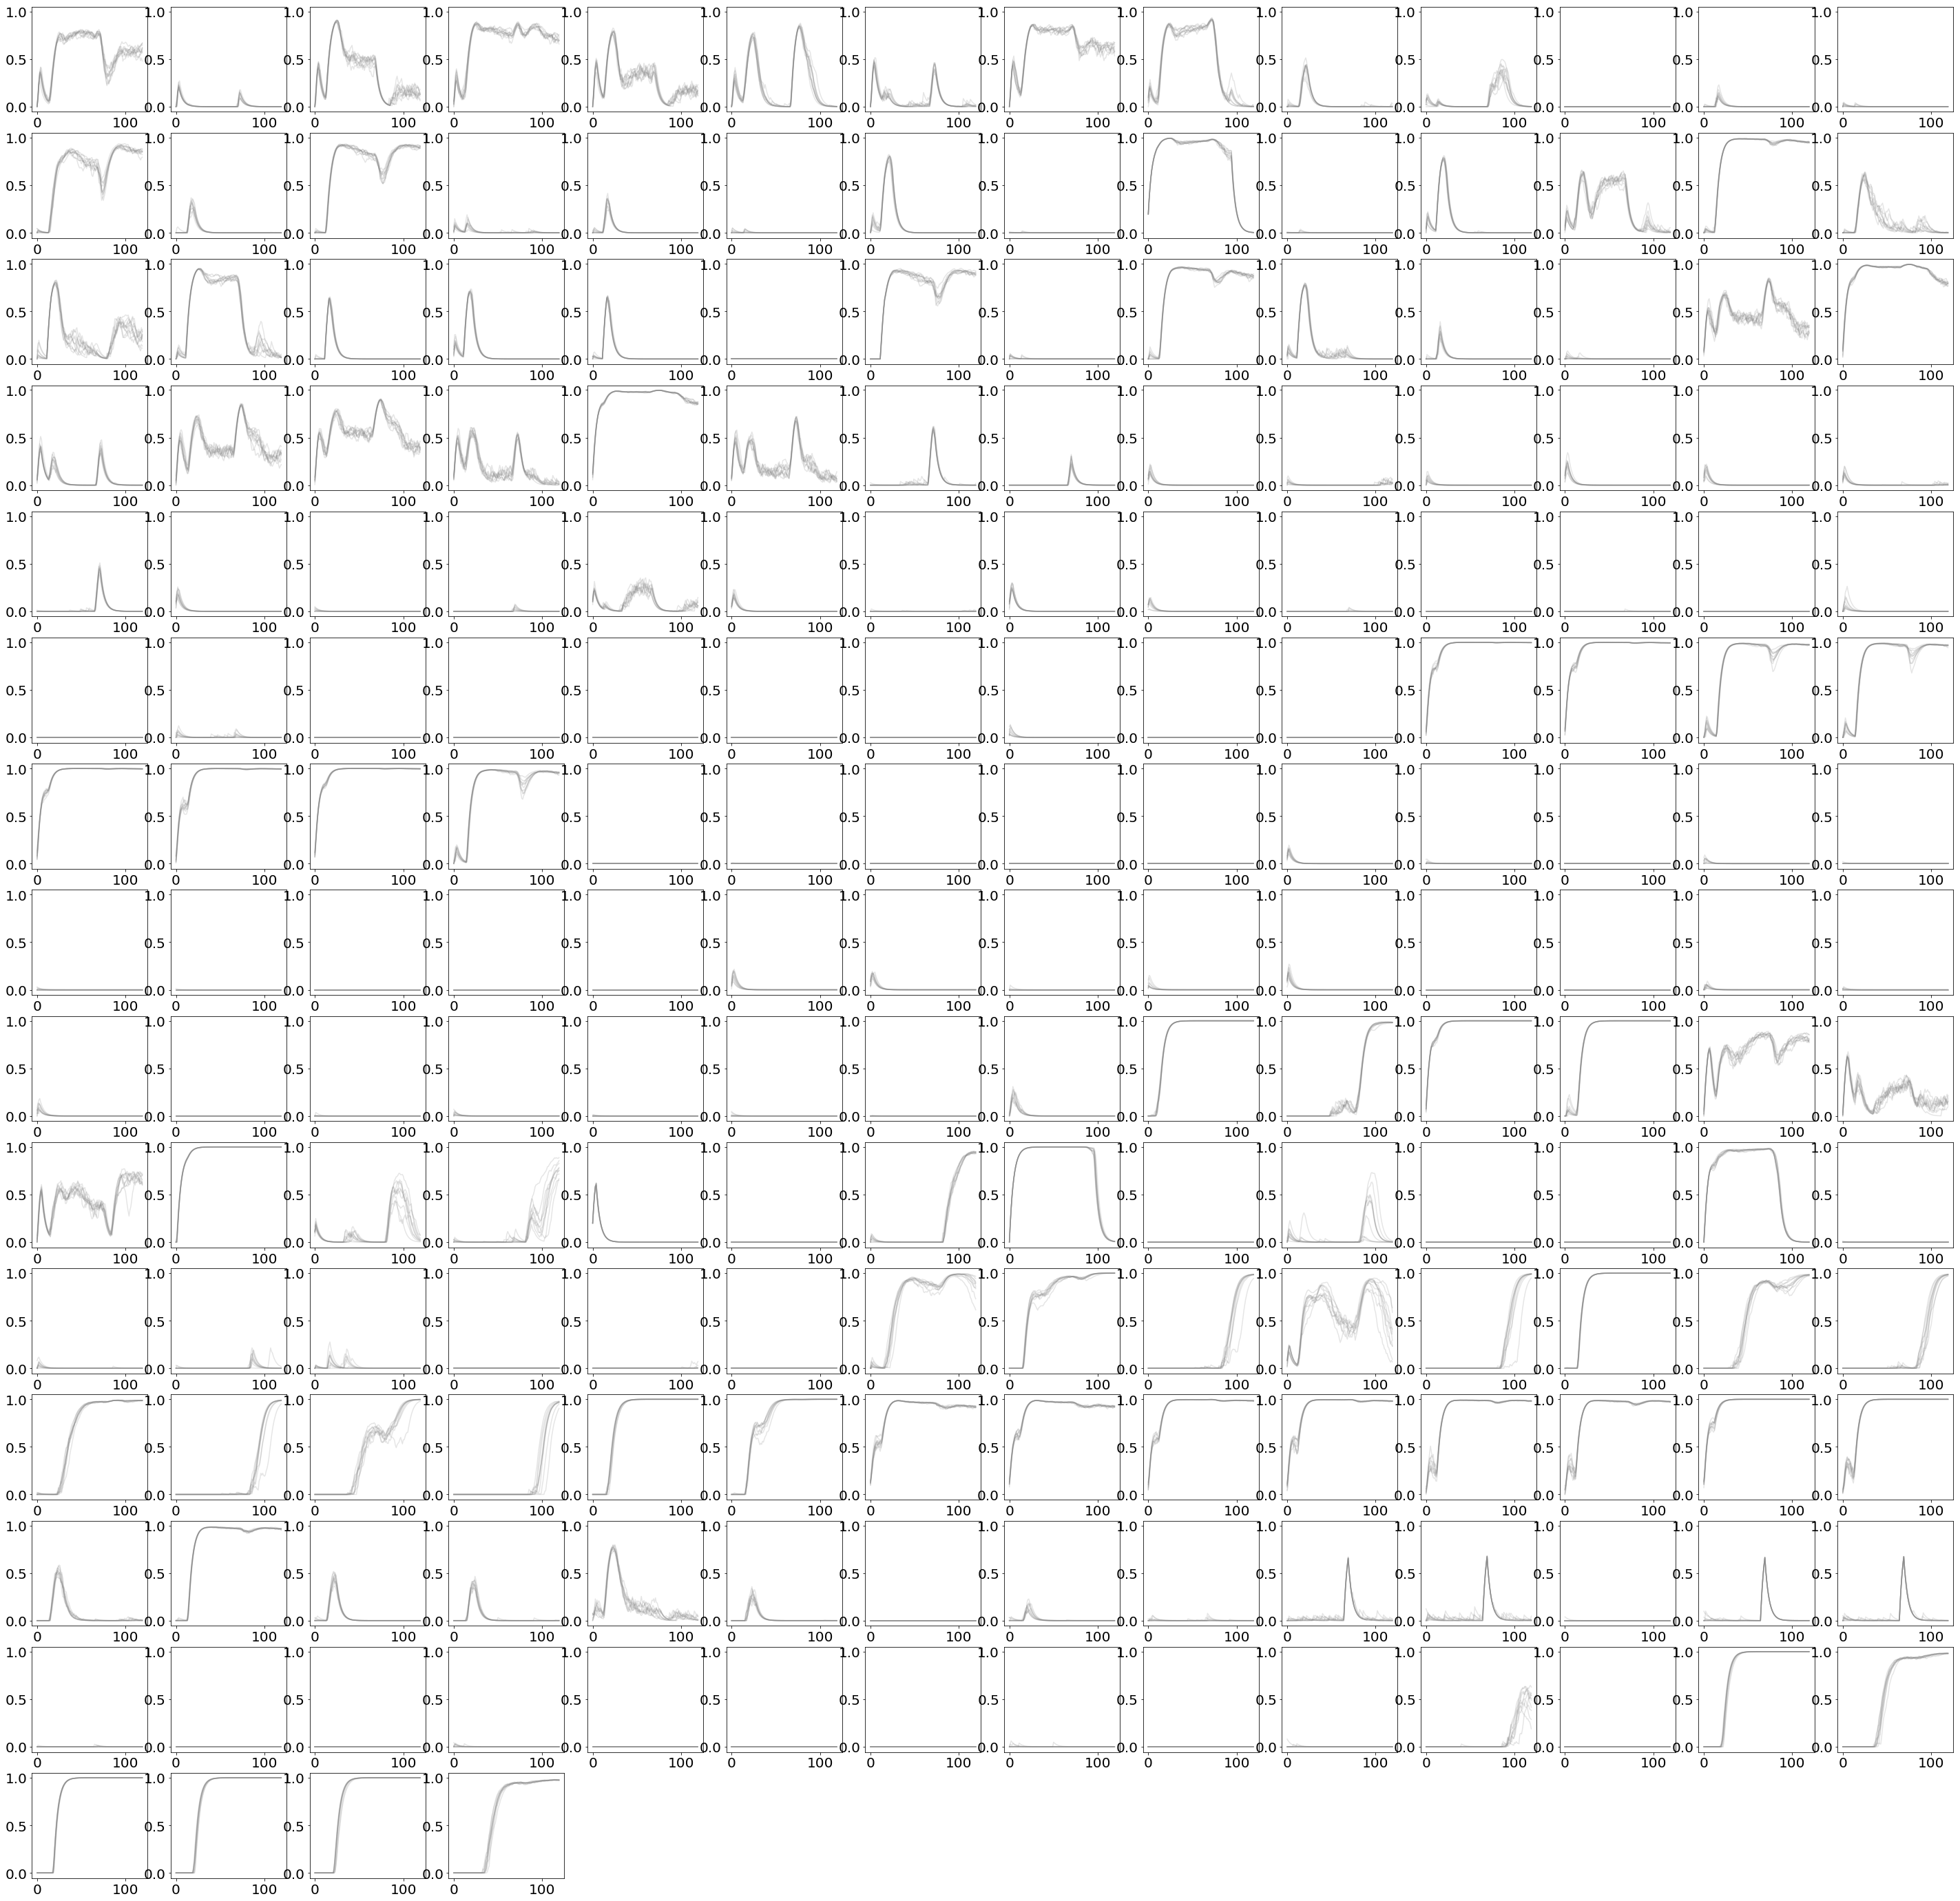

In [41]:
importlib.reload(mrnn)
mrnn.plot_unit_activations(activations)#, global_y_lims=[-0.99, 20.5])

In [60]:
units_to_lesion = range(40,80)

importlib.reload(mrnn)
perf_pre, perf_post = mrnn.perf_pre_post_lesion(model_dir, rule, units_to_lesion)
print('{:0.2f}% performance drop'.format(100*(perf_pre-perf_post)))


Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:433: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(267, 200) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(200,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(200, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_3/model.ckpt
77.30% performance drop
